In [105]:
import pandas as pd
import matplotlib.pyplot as plt
#TASK1.1
df = pd.read_csv('Data2.csv', sep = ';', encoding='cp1252', decimal = ',')
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0


In [106]:
#TASK1.2
#if no decimal in read_csv(остались бы запятые в числах и колонки не читались бы как float)
#def convert_column_to_float(dataset, column_label):
    #dataset[column_label] = dataset[column_label] \
        #.str.replace(',', '.') \
        #.astype(float)

#convert_column_to_float(df, 'GDP per capita')
#convert_column_to_float(df, 'CO2 emission')
#convert_column_to_float(df, 'Area')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


In [107]:
#TASK1.3
df = df.rename(columns={'Populatiion':'Population'})
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0


In [108]:
df.describe()

,GDP per capita,Population,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13374.833168,3.432256e+07,1.651141e+05,6.126082e+05
std,18091.785849,1.347600e+08,8.335357e+05,1.829940e+06
min,-6722.223536,1.109700e+04,1.100100e+01,-6.765900e+05
25%,1926.540477,7.900265e+05,1.334788e+03,1.045000e+04
50%,5226.289415,6.221590e+06,9.108828e+03,9.222500e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474000e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [109]:
#1 variant for every not object value
df1 = df
df1 = df1.apply(lambda x: x if x.dtype == "object" else x.abs())
df1.describe()

,GDP per capita,Population,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05
std,18038.981506,1.347600e+08,8.335357e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2031.779671,7.900265e+05,1.334788e+03,1.088700e+04
50%,5235.308547,6.221590e+06,9.108828e+03,9.303000e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [110]:
#2 variant for every float and int value
df2 = df
numeric_columns = df2.select_dtypes(include=[float,int]).columns
df2[numeric_columns] = df2[numeric_columns].abs()
df2.describe()

,GDP per capita,Population,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05
std,18038.981506,1.347600e+08,8.335357e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2031.779671,7.900265e+05,1.334788e+03,1.088700e+04
50%,5235.308547,6.221590e+06,9.108828e+03,9.303000e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [111]:
#3 variant for specify columns
df3 = df
df3['GDP per capita'] = df3['GDP per capita'].abs()
df3['Area'] = df3['Area'].abs()
df3.describe()

,GDP per capita,Population,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05
std,18038.981506,1.347600e+08,8.335357e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2031.779671,7.900265e+05,1.334788e+03,1.088700e+04
50%,5235.308547,6.221590e+06,9.108828e+03,9.303000e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [112]:
#4 variant
df4 = df
for col in df4.columns:
    if df4[col].dtype == float or df4[col].dtype == int:
        df4[col] = df[col].abs()
df4.describe()

,GDP per capita,Population,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05
std,18038.981506,1.347600e+08,8.335357e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2031.779671,7.900265e+05,1.334788e+03,1.088700e+04
50%,5235.308547,6.221590e+06,9.108828e+03,9.303000e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [113]:
df = df4
df.isna().any()

Country Name      False
Region            False
GDP per capita     True
Population         True
CO2 emission       True
Area              False
dtype: bool

In [114]:
df = df.fillna(df.mean(numeric_only=True))
df.isna().any()

Country Name      False
Region            False
GDP per capita    False
Population        False
CO2 emission      False
Area              False
dtype: bool

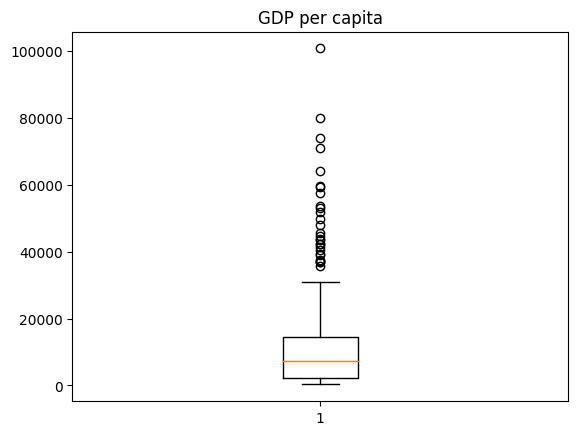

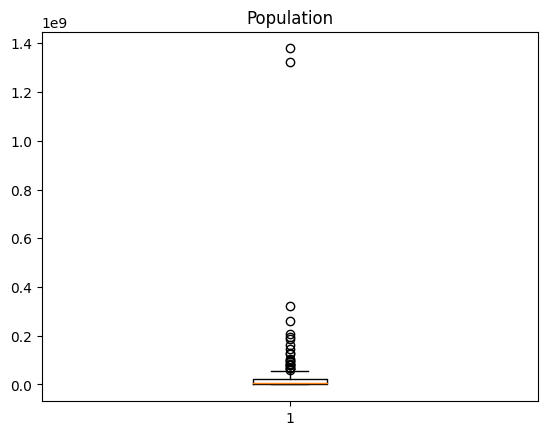

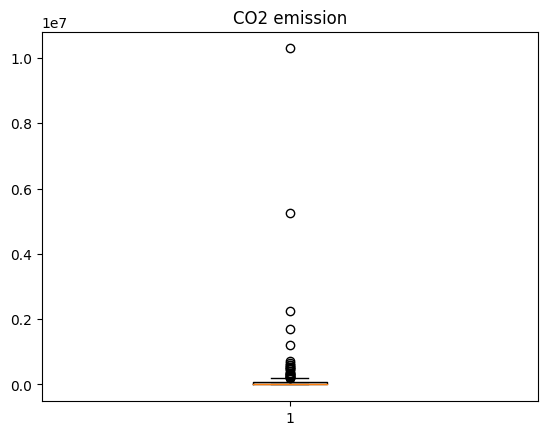

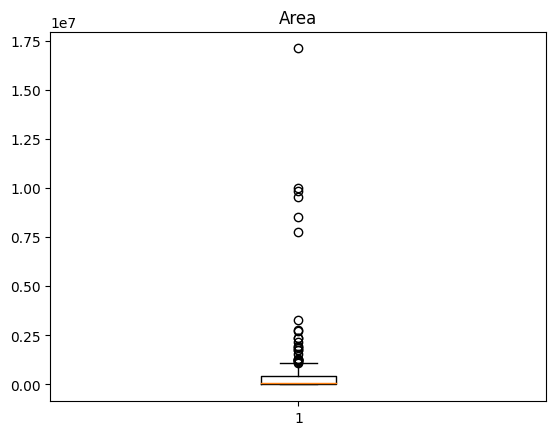

In [115]:
#TASK1.4
for column in df.columns:
    if df[column].dtype == float or df[column].dtype == int:
        plt.figure()
        plt.title(column)
        plt.boxplot(df[column])
        plt.show()

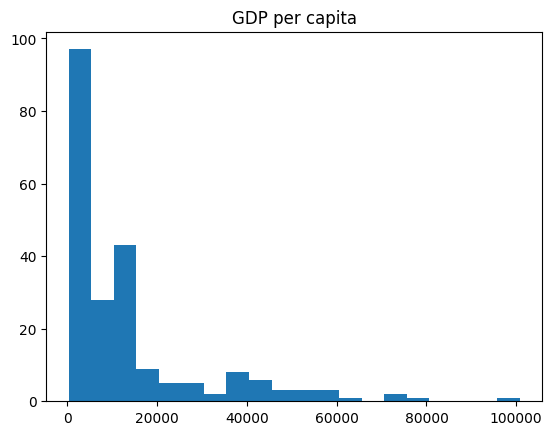

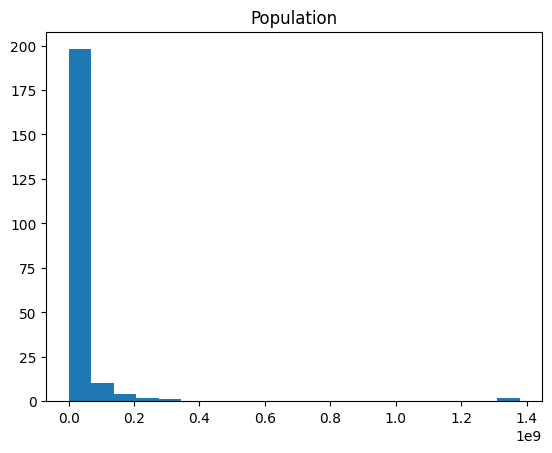

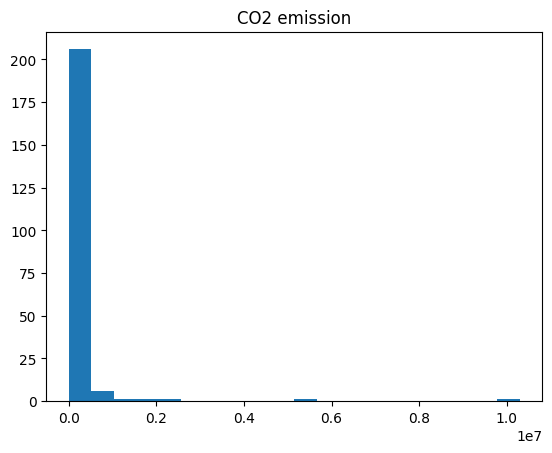

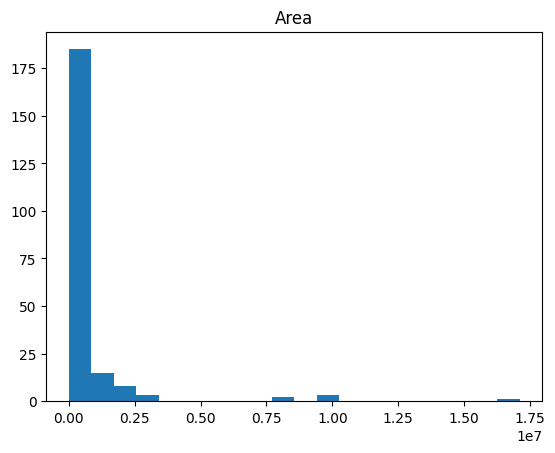

In [116]:
for column in df.columns:
    if df[column].dtype == float or df[column].dtype == int:
        plt.figure()
        plt.title(column)
        plt.hist(df[column],bins = 20)
        plt.show()


In [117]:
#df.boxplot()
#plt.show()
#df.hist(bins = 20)
#plt.show()

In [118]:
#TASK1.5
df['Population density'] = df['Population']/df['Area']
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951.0,165114.116337,350.0,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,165114.116337,6020.0,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730000,527970.0,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076000,752610.0,22.045136


In [119]:
#ADDITIONAL TASKS
#1 is done df = df.fillna(df.mean(numeric_only = True))
#2
max_gdp_row = df.loc[df['GDP per capita'].idxmax()]
max_gdp_country_name = max_gdp_row['Country Name']
print(max_gdp_country_name)
print(f"The biggest gdp per capita is in {max_gdp_row['Country Name']} = {max_gdp_row['GDP per capita']}")

Luxembourg
The biggest gdp per capita is in Luxembourg = 100738.6842


In [120]:
min_area_row_df = df.loc[df['Area'].idxmin()]
min_area_country_name = min_area_row_df['Country Name']
print(min_area_country_name)
print(f"The smallest area is in {min_area_row_df['Country Name']} = {min_area_row_df['GDP per capita']}")

Monaco
The smallest area is in Monaco = 13445.593416057367


In [121]:
#3
#first variant
#work with dataframe
df_grouped = df.groupby(['Region'],as_index=False).agg({'Area':'mean'})
max_area_row_df = df_grouped.loc[df_grouped['Area'].idxmax()]
name = max_area_row_df['Region']
print(f"The biggest mean of countries area is in {name}")

The biggest mean of countries area is in North America


In [122]:
#second variant
#work with seria
seria_grouped = df.groupby(['Region'])['Area'].mean()
name1 = seria_grouped.idxmax()
print(f"The biggest mean of countries area is in {name1}")

The biggest mean of countries area is in North America


In [123]:
#4
#world
max_den_row_df = df.loc[df['Population density'].idxmax()]
max_den_name = max_den_row_df['Country Name']
print(f"The biggest pop density in the world is in {max_den_name}.")

The biggest pop density in the world is in Macao SAR, China.


In [124]:
#Europe & Central Asia
max_den_row_df = df.loc[df[df['Region'] == 'Europe & Central Asia']['Population density'].idxmax()]
max_den_name = max_den_row_df['Country Name']
print(f"The biggest pop density in Europe & Central Asia is in {max_den_name}.")

The biggest pop density in Europe & Central Asia is in Monaco.


In [125]:
#5
#1variant
mean_reg_gdp = df.groupby(['Region'])['GDP per capita'].mean()
median_reg_gdp = df.groupby(['Region'])['GDP per capita'].median()
print(pd.merge(mean_reg_gdp, median_reg_gdp, how='inner'))


Empty DataFrame
Columns: [GDP per capita]
Index: []


In [126]:
#2variant
seria_reg = df.groupby(['Region'])['GDP per capita'].agg(['mean','median'])
seria_reg['='] = seria_reg['mean'] == seria_reg['median']
seria_reg

,mean,median,=
Region,,,
East Asia & Pacific,15130.226548,5910.620932,False
Europe & Central Asia,22742.135518,13445.593416,False
Latin America & Caribbean,10485.343136,10833.201075,False
Middle East & North Africa,15459.162533,13445.593416,False
North America,37755.682535,42183.295100,False
South Asia,2795.213935,1576.608412,False
Sub-Saharan Africa,2878.665521,1034.390361,False


In [127]:
#6
sorted_by_gdp = df.sort_values(by='GDP per capita', ascending=False)
sorted_by_gdp.head(5)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
115,Luxembourg,Europe & Central Asia,100738.68420,582972.0,9658.878,2590.0,225.085714
188,Switzerland,Europe & Central Asia,79887.51824,8372098.0,35305.876,41290.0,202.763333
116,"Macao SAR, China",East Asia & Pacific,74017.18471,612167.0,1283.450,30.3,20203.531353
146,Norway,Europe & Central Asia,70868.12250,5232929.0,47626.996,385178.0,13.585742
92,Ireland,Europe & Central Asia,64175.43824,4773095.0,34066.430,70280.0,67.915410


In [128]:
sorted_by_gdp.tail(5)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
118,Madagascar,Sub-Saharan Africa,401.742270,24894551.0,3076.613,587295.0,42.388495
37,Central African Republic,Sub-Saharan Africa,382.213174,4594621.0,300.694,622980.0,7.375230
134,Mozambique,Sub-Saharan Africa,382.069330,28829476.0,8426.766,799380.0,36.064795
119,Malawi,Sub-Saharan Africa,300.307665,18091575.0,1276.116,118480.0,152.697291
31,Burundi,Sub-Saharan Africa,285.727442,10524117.0,440.040,27830.0,378.157276


In [129]:
df['CO2_per_capita'] = df['CO2 emission']/df['Population']
sorted_by_co2 = df.sort_values(by='CO2_per_capita', ascending=False)
sorted_by_co2.head(5)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,CO2_per_capita
182,St. Martin (French part),Latin America & Caribbean,13445.593416,31949.0,165114.116337,54.4,587.297794,5.168053
163,San Marino,Europe & Central Asia,47908.561410,33203.0,165114.116337,60.0,553.383333,4.972867
130,Monaco,Europe & Central Asia,13445.593416,38499.0,165114.116337,2.0,19249.500000,4.288790
145,Northern Mariana Islands,East Asia & Pacific,22572.378820,55023.0,165114.116337,460.0,119.615217,3.000820
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000,2.969732


In [130]:
sorted_by_co2.tail(5)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,CO2_per_capita
44,"Congo, Dem. Rep.",Sub-Saharan Africa,405.542501,7.873615e+07,4671.758,2344860.0,33.578189,0.000059
38,Chad,Sub-Saharan Africa,664.295652,1.445254e+07,729.733,1284000.0,11.255875,0.000050
175,Somalia,Sub-Saharan Africa,434.208810,1.431800e+07,608.722,637660.0,22.453966,0.000043
31,Burundi,Sub-Saharan Africa,285.727442,1.052412e+07,440.040,27830.0,378.157276,0.000042
61,Eritrea,Sub-Saharan Africa,13445.593416,3.432256e+07,696.730,117600.0,291.858502,0.000020
